<a href="https://colab.research.google.com/github/nicolasrondan/cv-um-2025/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla
import seaborn as sns
%matplotlib inline


## Define Functions for Linear Regression  ##


In [3]:
def rbfs(X: np.ndarray, K: int, hh: float, R: float) -> np.ndarray:
    """
    Compute Radial Basis Function (RBF) features for input data.

    Args:
        X (np.ndarray): Input array of shape (N, 1), where N is the number of samples.
        K (int): Number of RBFs.
        hh (float): Width (standard deviation) of the RBFs.
        R (float): Range for spacing the RBF centers.

    Returns:
        np.ndarray: Feature matrix of shape (N, K) with RBF features.
    """
    assert X.shape[1] == 1  # Assuming one dimensional inputs.
    cc = np.linspace(0, R, K)[None, :]
    return np.exp(-((X - cc) ** 2) / hh**2)


def fit_linreg_rbf(
    X: np.ndarray, yy: np.ndarray, k: int, hh: float, R: float, alpha: float
) -> tuple[np.ndarray, float]:
    """
    Fit linear regression using K RBFs spaced in range 0 to R with optional regularization.

    Args:
        X (np.ndarray): Input array of shape (N,).
        yy (np.ndarray): Target values of shape (N,).
        k (int): Number of RBFs.
        hh (float): Width of the RBFs.
        R (float): Range for spacing the RBF centers.
        alpha (float): Regularization strength.

    Returns:
        tuple[np.ndarray, float]: Tuple containing weights (excluding bias) and bias term.
    """
    X_rbf = rbfs(X[:, None], k, hh, R)
    b = np.ones(X_rbf.shape[0])
    phi = np.vstack([b, X_rbf.T]).T
    alpha_identity = np.identity(X_rbf.shape[1]) * np.sqrt(alpha)
    zeros = np.zeros(X_rbf.shape[1])
    regularizer = np.identity(X_rbf.shape[1]) * np.sqrt(alpha)
    regularizer = np.vstack([zeros, regularizer.T]).T
    phi = np.vstack([phi, regularizer])
    yy_reg = np.hstack([yy, zeros]).T
    w_fit = np.linalg.lstsq(phi, yy_reg)[0]
    bias = w_fit[0]
    ww = w_fit[1:]
    return ww, bias


def fit_linreg_reg_b(
    X: np.ndarray, yy: np.ndarray, alpha: float
) -> tuple[np.ndarray, float]:
    """
    Fit linear regression using RBFs with regularization (bias is regularized).

    Args:
        X (np.ndarray): Input array of shape (N,).
        yy (np.ndarray): Target values of shape (N,).
        alpha (float): Regularization strength.

    Returns:
        tuple[np.ndarray, float]: Tuple containing weights (excluding bias) and bias term.
    """
    X_rbf = rbfs(X[:, None], K, hh, 80)
    b = np.ones(X_rbf.shape[0])
    phi = np.vstack([b, X_rbf.T]).T
    alpha_identity = np.identity(phi.shape[1]) * np.sqrt(alpha)
    regularizer = np.identity(phi.shape[1]) * np.sqrt(alpha)
    phi = np.vstack([phi, regularizer])
    zeros = np.zeros(phi.shape[1])
    yy_reg = np.hstack([yy, zeros]).T
    w_fit = np.linalg.lstsq(phi, yy_reg)[0]
    bias = w_fit[0]
    ww = w_fit[1:]
    return ww, bias


def fit_linear_regression(
    X: np.ndarray, y: np.ndarray
) -> tuple[np.ndarray, float]:
    """
    Fit simple linear regression without bias.

    Args:
        X (np.ndarray): Input array of shape (N,).
        y (np.ndarray): Target values of shape (N,).

    Returns:
        tuple[np.ndarray, float]: Tuple containing weights and bias (always 0).
    """
    phi = np.array([X]).T
    bias = 0
    yy = np.array([y]).T
    ww = np.linalg.lstsq(phi, yy)[0]
    return ww, bias


def fit_linear_regression_with_bias(
    X: np.ndarray, y: np.ndarray
) -> tuple[np.ndarray, float]:
    """
    Fit simple linear regression with bias.

    Args:
        X (np.ndarray): Input array of shape (N,).
        y (np.ndarray): Target values of shape (N,).

    Returns:
        tuple[np.ndarray, float]: Tuple containing weights (excluding bias) and bias term.
    """
    b = np.ones(X.shape[0])
    phi = np.vstack([b, X.T]).T
    yy = np.array([y]).T
    w_fit = np.linalg.lstsq(phi, yy)[0]
    bias = w_fit[0]
    ww = w_fit[1:]
    return ww, bias

In [4]:
def polynomial(X: np.ndarray, order: int) -> np.ndarray:
    """
    Generate polynomial features up to a given order for input data.

    Args:
        X (np.ndarray): Input array of shape (N, 1).
        order (int): The highest polynomial order.

    Returns:
        np.ndarray: Array of shape (N, order+1) with polynomial features.
    """
    assert(X.shape[1] == 1)
    exps = range(0, order + 1)
    return X ** exps

def fit_regression_poly_3(X: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, float]:
    """
    Fit a 3rd order polynomial regression model.

    Args:
        X (np.ndarray): Input array of shape (N, 1).
        y (np.ndarray): Target values of shape (N,).

    Returns:
        tuple[np.ndarray, float]: Tuple containing weights (excluding bias) and bias term.
    """
    phi = np.hstack([X**0, X**1, X**2, X**3])
    yy = np.array([y]).T
    print(phi)
    print(yy)
    w_fit = np.linalg.lstsq(phi, yy)[0]
    bias = w_fit[0]
    ww = w_fit[1:]
    return [ww, bias]

def poly(X: np.ndarray, K: int) -> np.ndarray:
    """
    Generate polynomial features up to order K for input data.

    Args:
        X (np.ndarray): Input array of shape (N, 1).
        K (int): The highest polynomial order.

    Returns:
        np.ndarray: Array of shape (N, K+1) with polynomial features.
    """
    phi_poly = X**0
    for i in range(1, K + 1):
        phi_poly = np.vstack([phi_poly.T, X**i]).T
    return phi_poly

def fit_regression_poly(X: np.ndarray, y: np.ndarray, order: int) -> tuple[np.ndarray, float]:
    """
    Fit a polynomial regression model of a given order.

    Args:
        X (np.ndarray): Input array of shape (N, 1).
        y (np.ndarray): Target values of shape (N,).
        order (int): The highest polynomial order.

    Returns:
        tuple[np.ndarray, float]: Tuple containing weights (excluding bias) and bias term.
    """
    phi = poly(X, order)
    yy = np.array([y]).T
    w_fit = np.linalg.lstsq(phi, yy)[0]
    bias = w_fit[0]
    ww = w_fit[1:]
    return [ww, bias]

def fit_regression_poly_reg(
    X: np.ndarray, y: np.ndarray, order: int, alpha: float
) -> tuple[np.ndarray, float]:
    """
    Fit a regularized polynomial regression model of a given order.

    Args:
        X (np.ndarray): Input array of shape (N, 1).
        y (np.ndarray): Target values of shape (N,).
        order (int): The highest polynomial order.
        alpha (float): Regularization strength.

    Returns:
        tuple[np.ndarray, float]: Tuple containing weights (excluding bias) and bias term.
    """
    polynomial_features = poly(X, order)
    X_poly = polynomial_features.T[1:].T  # no bias
    b = np.ones(X_poly.shape[0])
    phi = np.vstack([b, X_poly.T]).T
    alpha_identity = np.identity(X_poly.shape[1]) * np.sqrt(alpha)
    zeros = np.zeros(X_poly.shape[1])
    regularizer = np.identity(X_poly.shape[1]) * np.sqrt(alpha)
    regularizer = np.vstack([zeros, regularizer.T]).T
    phi = np.vstack([phi, regularizer])
    yy = np.hstack([y, zeros]).T
    w_fit = np.linalg.lstsq(phi, yy)[0]
    bias = w_fit[0]
    ww = w_fit[1:]
    return [ww, bias]


### Define Function Points ###

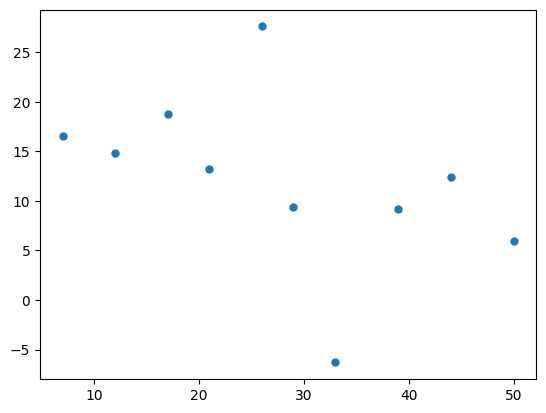

In [5]:
X=np.array([7,12,17,21,26,29,33,39,44,50])
Y=np.array([16.5,14.8,18.8,13.2,27.6,9.4,-6.3,9.2,12.4,6])
X.shape
plt.plot(X,Y,'o',markersize=5)

#### Fit simple Linear Regression No bias ####

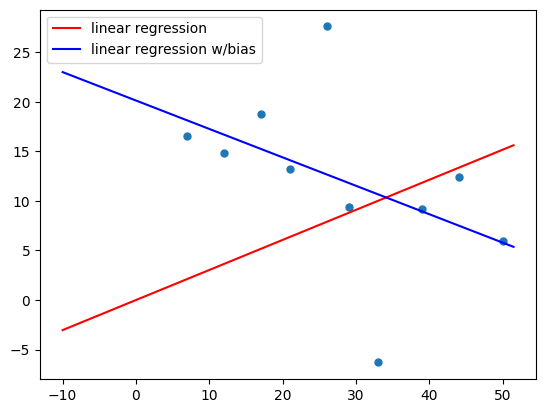

In [6]:
x_grid = np.arange(-10,52,0.5)
[ww, _] = fit_linear_regression(X,Y)
plt.plot(X,Y,'o',markersize=5)
plt.plot(x_grid,ww[0]*x_grid,'r-',label='linear regression')
plt.legend()

[ww1,b1] = fit_linear_regression_with_bias(X,Y)
plt.plot(x_grid,ww1[0]*x_grid+b1,'b-',label='linear regression w/bias')
plt.legend()
plt.show()

#### Regression with Polynomials

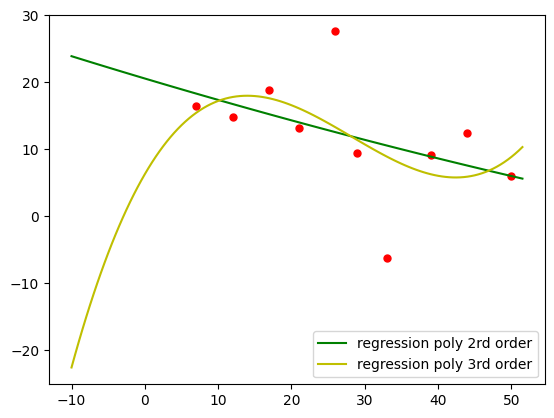

In [7]:
[ww2,b2] = fit_regression_poly(X,Y,2)
plt.plot(X,Y,'or',markersize=5)
plt.plot(x_grid,ww2[0]*x_grid + ww2[1]*x_grid**2 + b2,'g-',label='regression poly 2rd order')

[ww3,b3] = fit_regression_poly(X,Y,3)
plt.plot(x_grid, ww3[0]*x_grid + ww3[1]*x_grid**2 + ww3[2]*x_grid**3 + b3,'y-',label='regression poly 3rd order')

#[ww5,b5] = fit_regression_poly(X,Y,5)
#plt.plot(x_grid, ww5[0]*x_grid + ww5[1]*x_grid**2 + ww5[2]*x_grid**3 + ww5[3]*x_grid**4 + ww5[4]*x_grid**5 + b5,'c-',label='regression poly 5rd order')

plt.legend()
plt.show()


#### Regression with RBF functions 

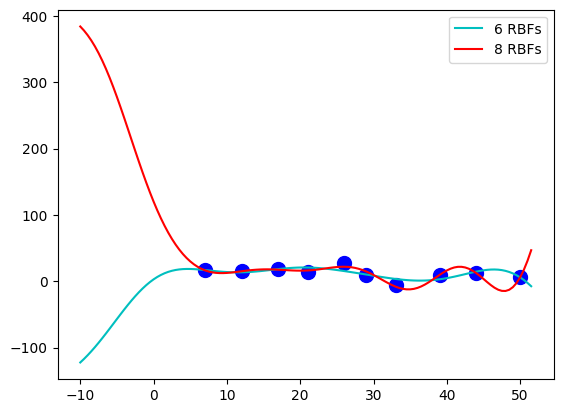

In [8]:

[ww_6,bias_6] = fit_linreg_rbf(X,Y,6,9,50,0)

[ww_8,bias_8] = fit_linreg_rbf(X,Y,8,7,50,0)

[ww_9,bias_9] = fit_linreg_rbf(X,Y,9,3,50,0)


plt.plot(X,Y,'ob',markersize=10)

plt.plot(x_grid,rbfs(x_grid[:,None],6,9,50).dot(ww_6) + bias_6,'c', label='6 RBFs')

plt.plot(x_grid,rbfs(x_grid[:,None],8,7,50).dot(ww_8) + bias_8,'r', label='8 RBFs')

#plt.plot(x_grid,rbfs(x_grid[:,None],9,3,50).dot(ww_9) + bias_9,'g', label='9 RBFs')

plt.legend()
plt.show()

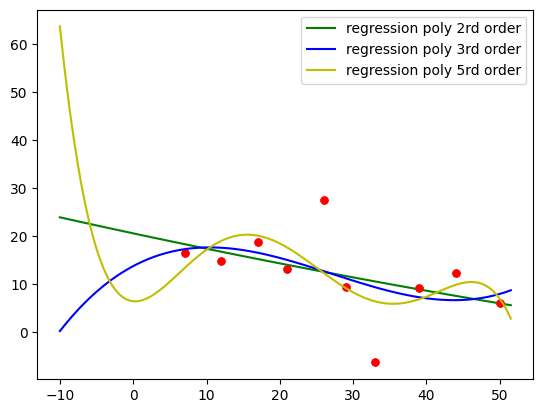

In [9]:
[ww2,b2] = fit_regression_poly_reg(X,Y,2,0)
plt.plot(X,Y,'or',markersize=5)
plt.plot(x_grid,ww2[0]*x_grid + ww2[1]*x_grid**2 + b2,'g-',label='regression poly 2rd order')

[ww2,b2] = fit_regression_poly_reg(X,Y,3,10)
plt.plot(X,Y,'or',markersize=5)
plt.plot(x_grid,ww2[0]*x_grid + ww2[1]*x_grid**2 + ww2[2]*x_grid**3 + b2,'b-',label='regression poly 3rd order')

[ww3,b3] = fit_regression_poly_reg(X,Y,5,20)
plt.plot(x_grid, ww3[0]*x_grid + ww3[1]*x_grid**2 + ww3[2]*x_grid**3 + ww3[3]*x_grid**4 + ww3[4]*x_grid**5 + b3,'y-',label='regression poly 5rd order')

#[ww5,b5] = fit_regression_poly_reg(X,Y,10,10000)
#plt.plot(x_grid, ww5[0]*x_grid + ww5[1]*x_grid**2 + ww5[2]*x_grid**3 + ww5[3]*x_grid**4 + ww5[4]*x_grid**5 + ww5[5]*x_grid**6 + ww5[6]*x_grid**7 + ww5[7]*x_grid**8 + ww5[8]*x_grid**9 + ww5[9]*x_grid**10 + b5,'c-',label='regression poly 10rd order')

plt.legend()
plt.show()

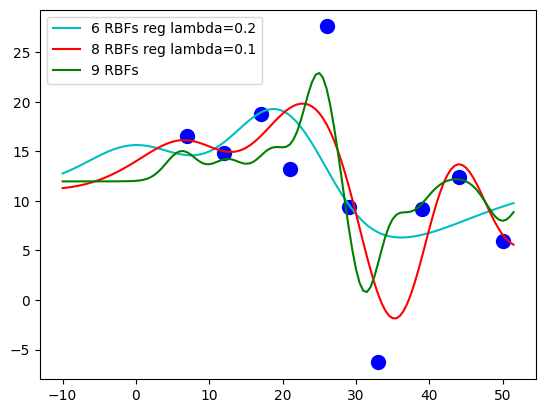

In [10]:
[ww_6,bias_6] = fit_linreg_rbf(X,Y,6,9,50,0.2)

[ww_8,bias_8] = fit_linreg_rbf(X,Y,8,7,50,0.1)

[ww_9,bias_9] = fit_linreg_rbf(X,Y,9,3,50,0.5)


plt.plot(X,Y,'ob',markersize=10)

plt.plot(x_grid,rbfs(x_grid[:,None],6,9,50).dot(ww_6) + bias_6,'c', label='6 RBFs reg lambda=0.2')

plt.plot(x_grid,rbfs(x_grid[:,None],8,7,50).dot(ww_8) + bias_8,'r', label='8 RBFs reg lambda=0.1')

plt.plot(x_grid,rbfs(x_grid[:,None],9,3,50).dot(ww_9) + bias_9,'g', label='9 RBFs')

plt.legend()
plt.show()